# Лабораторная работа №1. Разведочный анализ данных. Исследование и визуализация данных.


## Текстовое описание набора данных

В качестве набора данных был выбран тестовый датасет из библиотеки sklearn, содержащий данные о пациентах, больных диабетом.

Датасет состоит из одной таблицы, которая содержит следующие столбцы:
- age - возраст пациента
- sex - пол пациента
- bmi - индекс BMI
- bp - среднее кровяное давленее
- s1 tc - общий сывороточный холестерин
- s2 ldl - липопротеины низкой плотности
- s3 hdl - липопротеины высокой плотности
- s4 tch - общий холестерин/ЛПВП
- s5 ltg - уровень триглицеридов
- s6 glu - уровень сахара в крови
- target - количественная мера прогрессирования заболевания через год после исходного уровня

## Импорт библиотек
Импортируем библиотеки с помощью команды import. Как правило, все команды import размещают в первой ячейке ноутбука, но мы в этом примере будем подключать все библиотеки последовательно, по мере их использования.

In [70]:
import sklearn.datasets as datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style = "ticks")

## Загрузка данных

Загрузим файлы датасета в помощью библиотеки Pandas и Sklearn. 

In [71]:
diabetes = datasets.load_diabetes(as_frame=True, scaled=False)
data = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']],
                     columns= diabetes['feature_names'] + ['target'])

## Основные характеристики датасета

In [72]:
# Первые 5 строк датасета
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [73]:
# Размер датасета - 442 строк, 11 колонок
data.shape

(442, 11)

In [74]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 442


In [75]:
# Список колонок
data.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

In [76]:
# Список колонок с типами данных
data.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [77]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

age - 0
sex - 0
bmi - 0
bp - 0
s1 - 0
s2 - 0
s3 - 0
s4 - 0
s5 - 0
s6 - 0
target - 0


In [78]:
# Основные статистические характеристки набора данных
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [79]:
# Определим уникальные значения для пола
data['sex'].unique()

array([2., 1.])

## Визуальное исследование датасета

### [Диаграмма рассеяния](https://en.wikipedia.org/wiki/Scatter_plot)

Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

<AxesSubplot:xlabel='s1', ylabel='s2'>

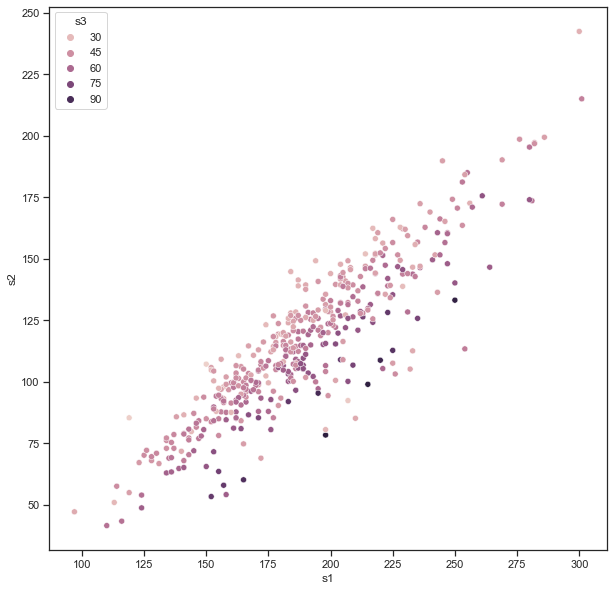

In [80]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='s1', y='s2', data=data, hue='s3')

Можно видеть что между признаками s1 и s2 пристутствует почти линейная зависимость.

Также можно заметить, что при одинаковом значении признака s1, более высокое значение признак s2 будет иметь при более низком значении признака s3

### [Гистограмма](https://en.wikipedia.org/wiki/Histogram) 
Позволяет оценить плотность вероятности распределения данных.

C:\Users\Zid\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

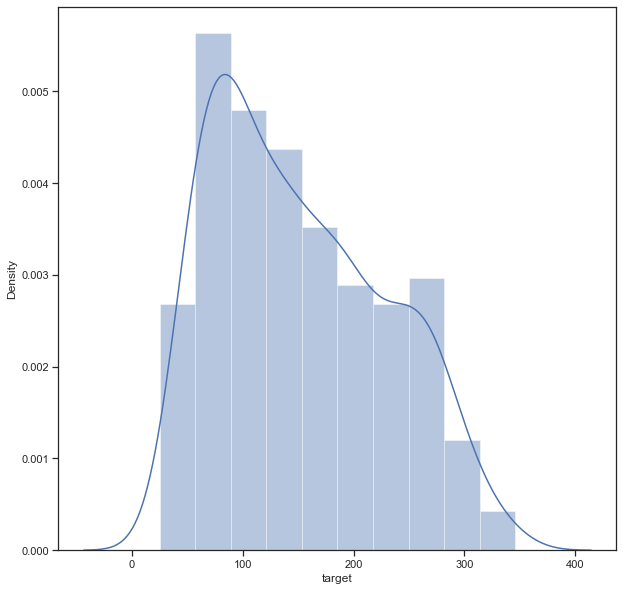

In [81]:
fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(data['target'])

Можно заметить, что мера прогрессирования заболевания для большинства пациентов составляет около 100.

### "Парные диаграммы"
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

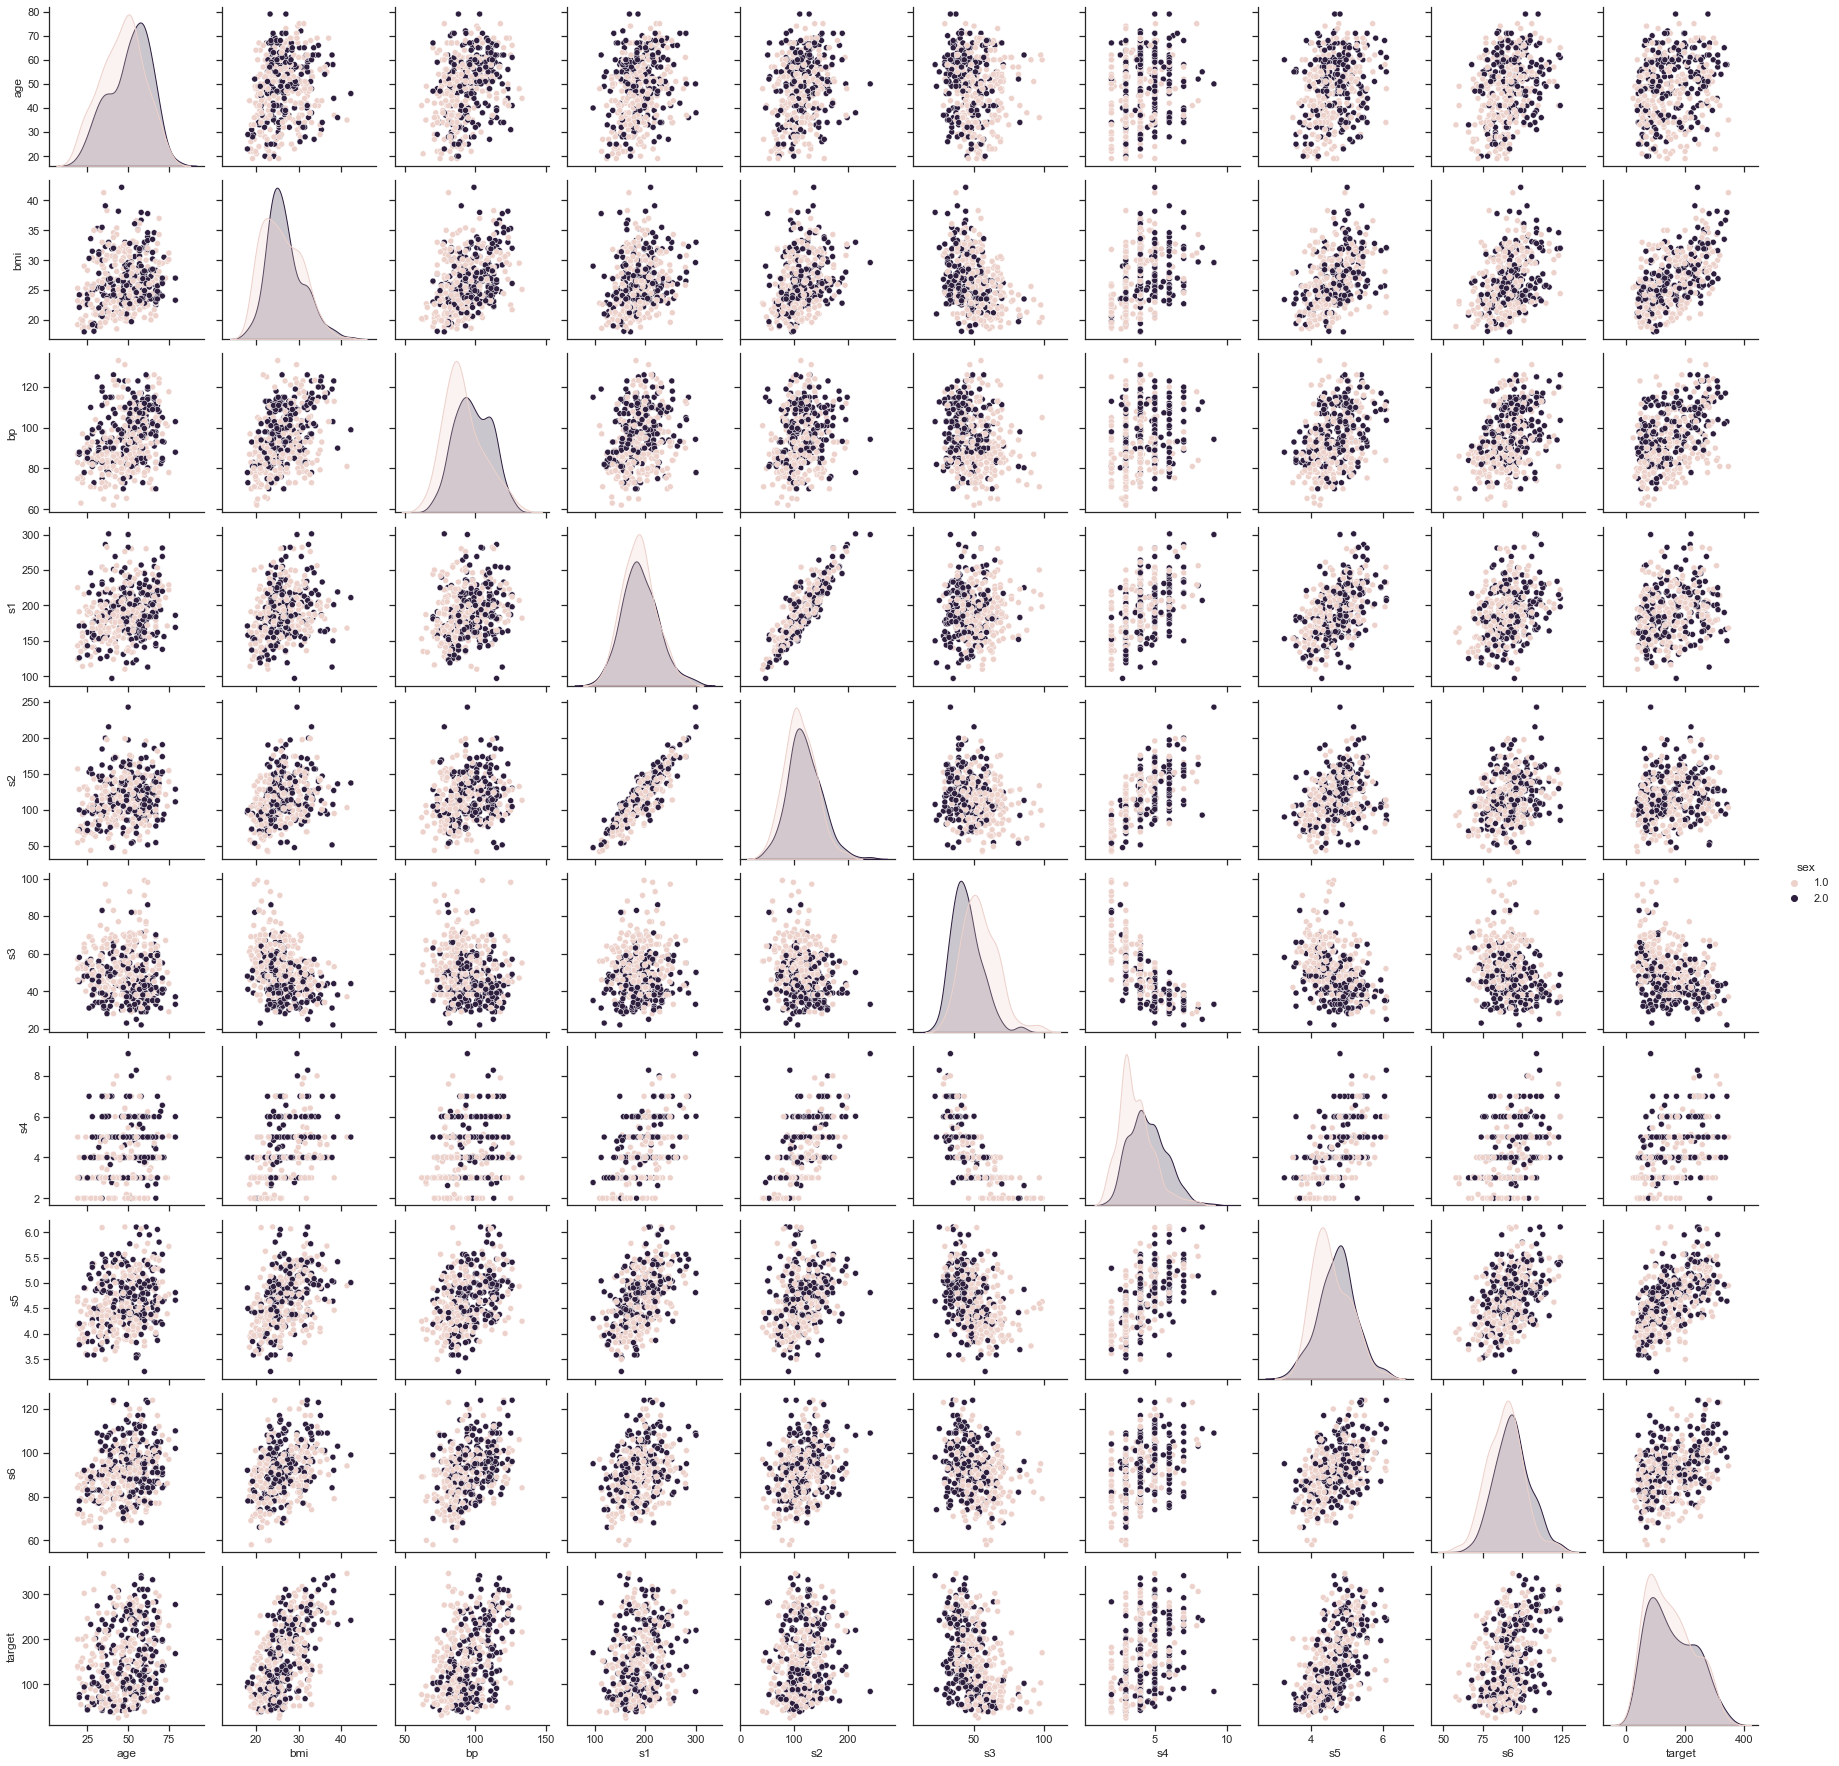

In [82]:
sns.pairplot(data, hue='sex')

Можно заметить корреляцию между признаками s1 и s2. А также что, признак s4 весьма дискертизирован.

### [Violin plot](https://en.wikipedia.org/wiki/Violin_plot)

<AxesSubplot:xlabel='sex', ylabel='bmi'>

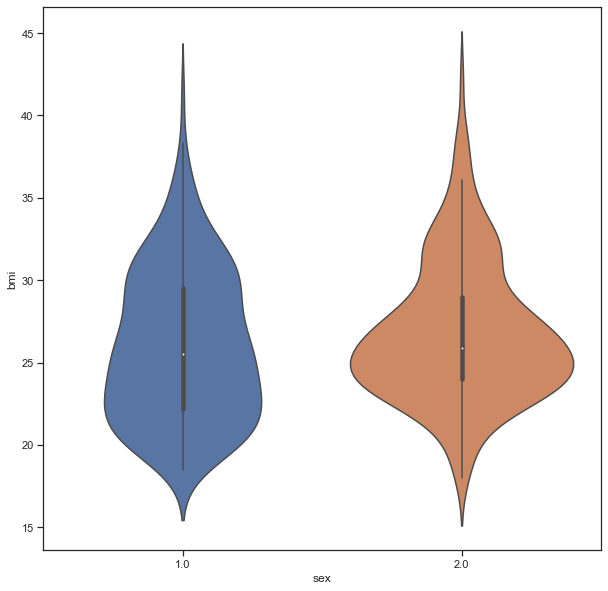

In [83]:
# Распределение параметра BMI сгруппированное по полу
fig, ax = plt.subplots(figsize=(10,10))
sns.violinplot(x='sex', y='bmi', data=data)

## Информация о корреляции признаков

Проверка корреляции признаков позволяет решить две задачи:
1. Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком. Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
1. Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [84]:
data.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


Для более удобной визуализации корреляции построим тепловую карту.

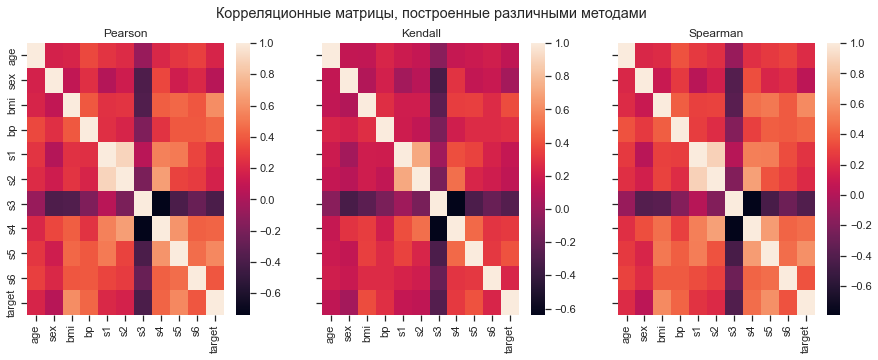

In [85]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0])
sns.heatmap(data.corr(method='kendall'), ax=ax[1])
sns.heatmap(data.corr(method='spearman'), ax=ax[2])
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

На основе корреляционной матрицы можно сделать следующие выводы:
- Признак s3 отрицательно коррелирует со всеми признаками (в том числе с полом и возрастом)
- Наибольшую корреляцию показывают признаки s1 и s2
- Для целевого показателя прогрессирования заболевания наиболее важными оказываются признаки bmi (0.586450), bp (0.441482), s3 (-0.394789), s4 (0.430453), s5 (0.565883	)